# Hyperopt tutorial

https://www.kaggle.com/fanvacoolt/tutorial-on-hyperopt

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from hyperopt import fmin, hp, tpe, Trials, space_eval
from hyperopt.pyll.stochastic import sample as ho_sample

In [4]:
SEED = 21

# Plotting limits
x_limits = (-10, 10)
y_limits = (-10, 10)

# --------------------------------

# Toy function
fct = lambda x, y: 5*np.exp(-((x - 3)**2 + (y - 4)**2)/4) + \
                   2*np.exp(-np.sqrt((x + 3)**2 + (y - 3)**2)/2) + \
                   1*np.exp(-np.sin(np.sqrt((x - 5)**2 + (y + 3)**2)/1))

# Defining mesh
xy_mesh = np.meshgrid(np.linspace(*x_limits, 2001), np.linspace(*x_limits, 2001))
fct_mesh = fct(xy_mesh[0], xy_mesh[1])

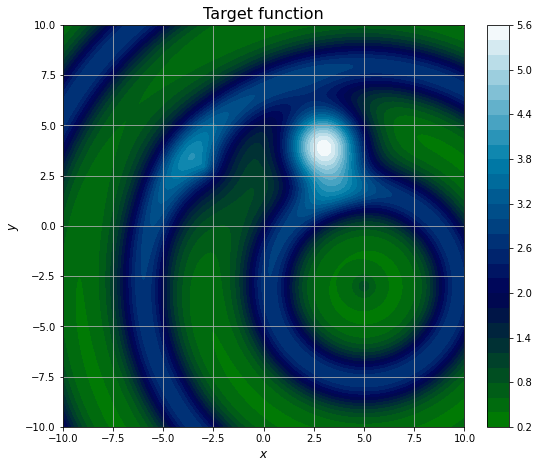

In [8]:
fig0 = plt.figure(figsize=(8, 8))

cntr = plt.contourf(xy_mesh[0], xy_mesh[1], fct_mesh, levels=30, cmap=plt.cm.ocean)
_ = fig0.colorbar(cntr, ax=plt.gca(), fraction=0.05, pad=0.05, aspect=18)

plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.title('Target function', fontsize=16)

plt.gca().grid(True)
plt.gca().set_aspect('equal')

In [30]:
# Number of points in Grid Search per coordinate
n_pts = 14

# Setting up hyperparameters space
hp_space = {
    'x': hp.uniform('x', *x_limits), 
    'y': hp.normal('y', 0, 5)
#     'y': hp.qloguniform('y', 0, 5, 1)
    
}

# Setting up number of evaluations and Trials object
n_evals = n_pts**2
trls = Trials()

# Running optimization
res_HO = fmin(
    lambda hps: -fct(hps['x'], hps['y']),
    space=hp_space,
    algo=tpe.suggest, 
    trials=trls,
    max_evals=n_evals,
    rstate=np.random.RandomState(SEED))

# Restoring search history and best point
xy_HO = [np.array([x['misc']['vals']['x'] for x in trls.trials]), 
         np.array([x['misc']['vals']['y'] for x in trls.trials])]

best_HO = (-trls.best_trial['result']['loss'], (space_eval(hp_space, res_HO)['x'], 
                                                space_eval(hp_space, res_HO)['y']))

100%|██████████| 196/196 [00:00<00:00, 281.51trial/s, best loss: -5.528460905856665]


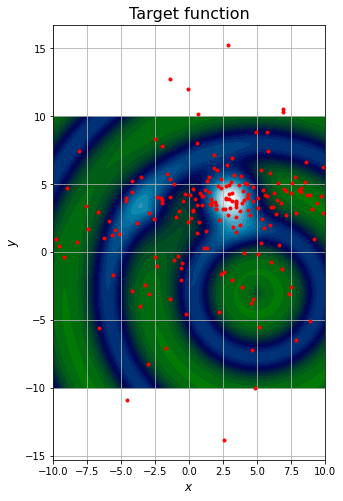

In [31]:
fig0 = plt.figure(figsize=(8, 8))

cntr = plt.contourf(xy_mesh[0], xy_mesh[1], fct_mesh, levels=30, cmap=plt.cm.ocean)
plt.plot(xy_HO[0], xy_HO[1], linewidth=0, marker='.', color='red')

# _ = fig0.colorbar(cntr, ax=plt.gca(), fraction=0.05, pad=0.05, aspect=18)

# Formatting axes
# set_xlim(x_limits)
# set_ylim(y_limits)

plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.title('Target function', fontsize=16)

plt.gca().grid(True)
plt.gca().set_aspect('equal')

In [38]:
ho_sample(hp_space)

{'x': -1.994118187196964, 'y': 4.9268653087332845}

In [62]:
def show_hp_space(hp_space):
    samples = [ho_sample(hp_space) for i in range(1000)]
    plt.hist(samples, bins=50)

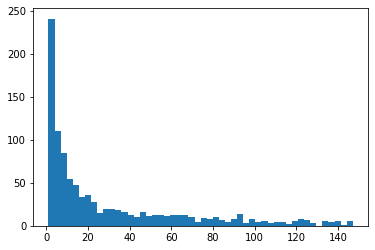

In [63]:
show_hp_space(hp.qloguniform('y', 0, 5, 1))

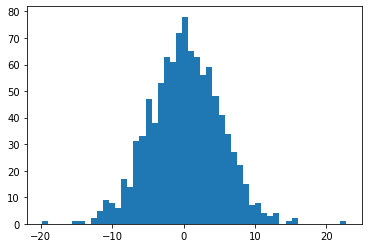

In [64]:
show_hp_space(hp.normal('y', 0, 5))